In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet

In [ ]:
df = pd.read_csv("ZHVA_SingleFamilyHomes.csv",delimiter=',',header=0)
df.head()

In [ ]:
zillowClean = df.filter(regex="(1997|1998|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|Metro|RegionName)", axis=1)

In [ ]:
zillowDropSome = zillowClean.dropna(how='any',axis=0, thresh=252) # requiring 252 records as this is 90% of records

In [ ]:
zillowGrilledCheese = zillowDropSome.drop("Metro",axis=1)
zillowGrilledCheese = pd.melt(zillowGrilledCheese,id_vars=["RegionName"],var_name='ds',value_name='y')
zillowGrilledCheese.head()

In [30]:
def forecast(x):
    x = zillowGrilledCheese[zillowGrilledCheese["RegionName"] == x]
    x = x[["ds","y"]]
    m = NeuralProphet()
    m.fit(x, freq="M")
    future = m.make_future_dataframe(x,periods=36)
    forecast = m.predict(future)
    fig = m.plot(forecast)
    #return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [31]:
x = zillowGrilledCheese[zillowGrilledCheese["RegionName"] == 2806]

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 111
 84%|████████▍ | 84/100 [00:00<00:00, 642.60it/s]
INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 3.51E-01
Epoch[111/111]: 100%|██████████| 111/111 [00:06<00:00, 17.87it/s, SmoothL1Loss=0.000391, MAE=8.11e+3, RegLoss=0]


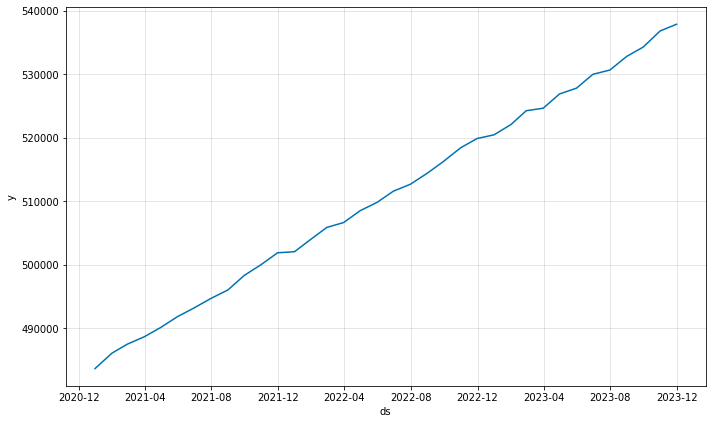

In [32]:
forecast(2806)